## Q3. Are there any differences in pickups on holidays compared to regular days?

### Conclusions and Analysis Question 3

According to the P-value analysis using an alpha limit of 0.05, there is a significant difference between the number of holiday pickups and regular days. This result could be due to the number of holidays in the calendar during the first semester of 2015. We counted 58 holidays, including weekends, in six months. 

However, the analysis of average pickups on holidays and regular days during the six months is quite similar, as shown on the graph "Monthly pickups count over 6 months." Both increase as time passes, with a slight decrease between March and April, possibly due to the spring break vacations. However, the number of pickups increased as the weather became warmer. 

A more focused analysis through the daily pickup change reinforces the idea of similar patterns. However, it took our attention one peak on the third weekend of May, followed by a high decrement of pickups next weekend. This behavior may be due to the long weekend of Memorial Day. Something similar happened one weekend before the 4th of July, which is an essential date for the USA. 

Regarding geospatial analysis,  we calculate the percentage of pickups in each borough during the six months. Manhattan is the borough with the most activity, taking 72.71% of the total pickups in NYC.

In the focused analysis by borough, pickups on EWR are predominant on weekdays. This behavior means that airport pickup is more likely on weekdays. The other boroughs are between ~34% on holidays and ~65% on weekdays. 

Finally, we can see a predominant pickup rate on holiday late hours using the heatmap visualization. Meanwhile, on weekdays, some boroughs have a nonhomogenous distribution between peak and late hours. 


### Data Preparation for Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
uber_weather_df = pd.read_csv("../Resources/clean.csv")
uber_weather_df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [3]:
total_pickups = uber_weather_df['pickups'].sum()
total_pickups

14261607.0

In [4]:
# Convert date columns to datetime objects
uber_weather_df['pickup_dt'] = pd.to_datetime(uber_weather_df['pickup_dt'])

# Convert 'Holiday' column to boolean
uber_weather_df['Holiday'] = uber_weather_df['Holiday'] == 'Y'

In [5]:
# Extract month and day from the 'pickup_dt' column
uber_weather_df['month'] = uber_weather_df['pickup_dt'].dt.month
uber_weather_df['day'] = uber_weather_df['pickup_dt'].dt.day

In [6]:
# Group the data by month and count unique days
unique_days_per_month = uber_weather_df.groupby('month')['day'].nunique()
# Group the data by month and get a list of unique days
unique_days_list_per_month = uber_weather_df.groupby('month')['day'].unique()

In [7]:
# Display the number of unique days per month
print("Number of Unique Days per Month:")
print(unique_days_per_month)

# Display the unique days for each month
print("\nUnique Days per Month:")
for month, days in unique_days_list_per_month.items():
    print(f"Month {month}: {days}")

Number of Unique Days per Month:
month
1    31
2    28
3    31
4    30
5    31
6    30
Name: day, dtype: int64

Unique Days per Month:
Month 1: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month 2: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Month 3: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month 4: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
Month 5: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Month 6: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [8]:
# Filter the data to include only rows where 'Holiday' is True
holidays_data = uber_weather_df[uber_weather_df['Holiday']]

# Extract the dates of holidays
holiday_dates = holidays_data['pickup_dt'].dt.date.unique()
#print(len(holiday_dates))
# Display the holiday dates
print("Dates of Holidays:")
for date in holiday_dates:
    print(date)

Dates of Holidays:
2015-01-01
2015-01-03
2015-01-04
2015-01-10
2015-01-11
2015-01-17
2015-01-18
2015-01-19
2015-01-24
2015-01-25
2015-01-31
2015-02-01
2015-02-07
2015-02-08
2015-02-12
2015-02-14
2015-02-15
2015-02-16
2015-02-21
2015-02-22
2015-02-28
2015-03-01
2015-03-07
2015-03-08
2015-03-14
2015-03-15
2015-03-21
2015-03-22
2015-03-28
2015-03-29
2015-04-04
2015-04-05
2015-04-11
2015-04-12
2015-04-18
2015-04-19
2015-04-25
2015-04-26
2015-05-02
2015-05-03
2015-05-09
2015-05-10
2015-05-16
2015-05-17
2015-05-23
2015-05-24
2015-05-25
2015-05-30
2015-05-31
2015-06-03
2015-06-06
2015-06-07
2015-06-13
2015-06-14
2015-06-20
2015-06-21
2015-06-27
2015-06-28


In [9]:
# # Extract the month and date from the holiday dates
holidays_data['Month'] = holidays_data['pickup_dt'].dt.month
holidays_data['Date'] = holidays_data['pickup_dt'].dt.date

# Drop duplicate dates (keeping the first occurrence)
unique_holidays = holidays_data.drop_duplicates(subset=['Month', 'Date'])

# Count the number of unique holidays per month
unique_holidays_per_month = unique_holidays.groupby('Month')['Date'].count().reset_index()

# Rename the columns for clarity
unique_holidays_per_month.columns = ['Month', 'Unique Holiday Count']

# Display the count of unique holidays per month in a DataFrame
# print("Count of Unique Holidays per Month:")
#unique_days_list_per_month.dtype
print(unique_holidays_per_month)
#unique_days_list_per_month


   Month  Unique Holiday Count
0      1                    11
1      2                    10
2      3                     9
3      4                     8
4      5                    11
5      6                     9


C:\Users\jherz\AppData\Local\Temp\ipykernel_2444\3129533910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_data['Month'] = holidays_data['pickup_dt'].dt.month
C:\Users\jherz\AppData\Local\Temp\ipykernel_2444\3129533910.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays_data['Date'] = holidays_data['pickup_dt'].dt.date


In [10]:
# Group the data by 'Holiday' column
grouped = uber_weather_df.groupby('Holiday')

# Calculate the average pickups for holidays and regular days
average_pickups = grouped['pickups'].mean()
average_pickups

Holiday
False    530.223031
True     588.951621
Name: pickups, dtype: float64

### Temporal analysis between holidays and regular days pickups

In [11]:
from scipy import stats

# Perform a t-test or Mann-Whitney U test
t_stat, p_value = stats.ttest_ind(uber_weather_df[uber_weather_df['Holiday']]['pickups'], uber_weather_df[~uber_weather_df['Holiday']]['pickups'])
alpha = 0.05
# Compare the p-value to the significance level
if p_value < alpha:
    significance_result = "There is a significant difference"
else:
    significance_result = "There is no significant difference"
#print(f"t-test value: {t_stat}") 
print(f" P Value: {p_value}")
significance_result

 P Value: 3.4303549208418395e-05


'There is a significant difference'

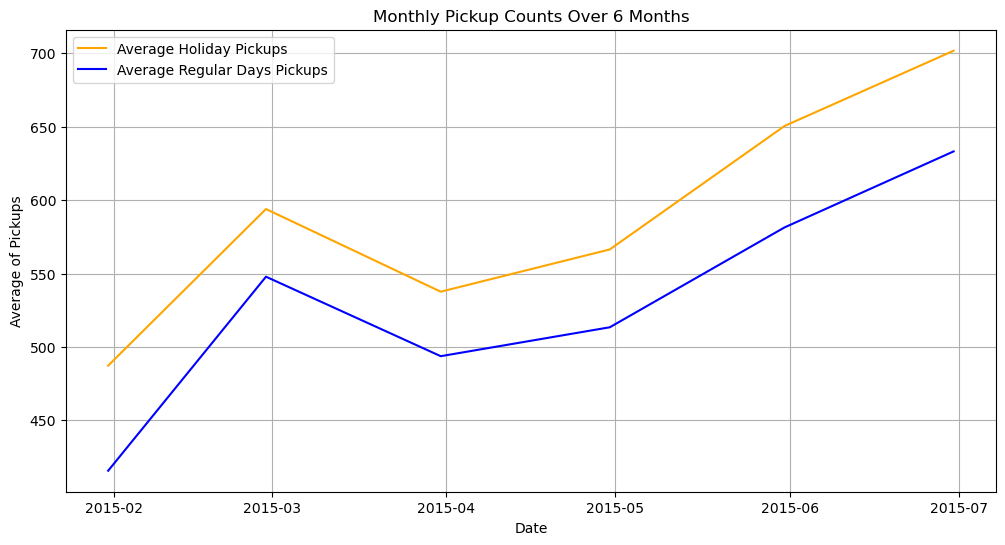

In [13]:
# Convert 'pickup_dt' column to a datetime object
uber_weather_df['pickup_dt'] = pd.to_datetime(uber_weather_df['pickup_dt'])

# Set 'pickup_dt' as the DataFrame's index
uber_weather_df.set_index('pickup_dt', inplace=True)

# Resample the data to monthly frequency and count the total pickups for each month
monthly_pickup_counts = uber_weather_df['pickups'].resample('M').mean()

# Filter the data to include only holiday days
holiday_data = uber_weather_df[uber_weather_df['Holiday']]
# Resample the holiday data to monthly frequency and count the total pickups for each month
monthly_holiday_pickup_counts = holiday_data['pickups'].resample('M').mean()

# Filter the data to include only regular days (non-holiday days)
regular_data = uber_weather_df[uber_weather_df['Holiday'] == False]
# Resample the regular data to monthly frequency and count the total pickups for each month
monthly_regular_pickup_counts = regular_data['pickups'].resample('M').mean()

# Create a single figure for the plot
plt.figure(figsize=(12, 6))

# Plot the time series for pickups on holidays
plt.plot(monthly_holiday_pickup_counts, label='Average Holiday Pickups', color='orange')

# Plot the time series for pickups on regular days
plt.plot(monthly_regular_pickup_counts, label='Average Regular Days Pickups', color='blue')

# Customize the plot
plt.title('Monthly Pickup Counts Over 6 Months')
plt.xlabel('Date')
plt.ylabel('Average of Pickups')
plt.grid(True)
plt.legend()


# Save the plot as an image file (e.g., PNG)
plt.savefig(f'Images/Q3-monthly-pickups-over-time.jpg')
# Show the plot
plt.show()



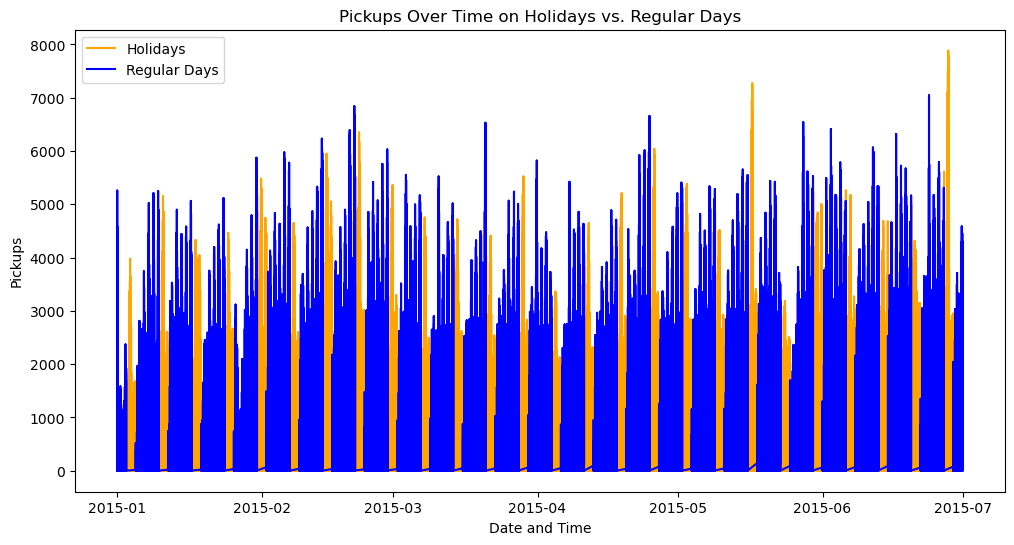

In [14]:
#Time Analysis
#this is a time series plot created by using multiple time periods, 
#This chart helps to visualize how pickups vary over time for both holidays and regular days.

uber_weather_df = pd.read_csv("Resources/clean.csv")
#uber_weather_df.head()
uber_weather_df['pickup_dt'] = uber_weather_df['pickup_dt'].astype('datetime64')
plt.figure(figsize=(12, 6))
plt.plot(uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] == 'Y']['pickups'], label='Holidays',color ="Orange")
plt.plot(uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickup_dt'], uber_weather_df[uber_weather_df['Holiday'] != 'Y']['pickups'], label='Regular Days', color="Blue")
plt.title("Pickups Over Time on Holidays vs. Regular Days")
plt.xlabel("Date and Time")
plt.ylabel("Pickups")
plt.legend()
# Save the plot as an image file (e.g., PNG)
plt.savefig(f'Images/Q3-Daily-pickups-over-time.jpg')

plt.show()

### Geospatial Anlaysis - Starting the analysis by Bourough

In [15]:
# Convert date columns to datetime objects
uber_weather_df['pickup_dt'] = pd.to_datetime(uber_weather_df['pickup_dt'])

# Convert 'Holiday' column to boolean
uber_weather_df['Holiday'] = uber_weather_df['Holiday'] == 'Y'

In [16]:
# Group the data by borough and calculate the total pickups and the mean pickups
borough_pickup_stats = uber_weather_df.groupby('borough')['pickups'].agg(['sum', 'mean']).reset_index()

# Calculate the percentage of pickups for each borough
total_pickups = borough_pickup_stats['sum'].sum()
borough_pickup_stats['percentage_of_pickups'] = (borough_pickup_stats['sum'] / total_pickups) * 100

print(borough_pickup_stats)

         borough         sum         mean  percentage_of_pickups
0          Bronx    220080.0    50.662983               1.543164
1       Brooklyn   2321552.0   534.427256              16.278334
2            EWR       105.0     0.024171               0.000736
3      Manhattan  10369142.0  2387.003223              72.706687
4         Queens   1343771.0   309.339549               9.422297
5  Staten Island      6957.0     1.601519               0.048781


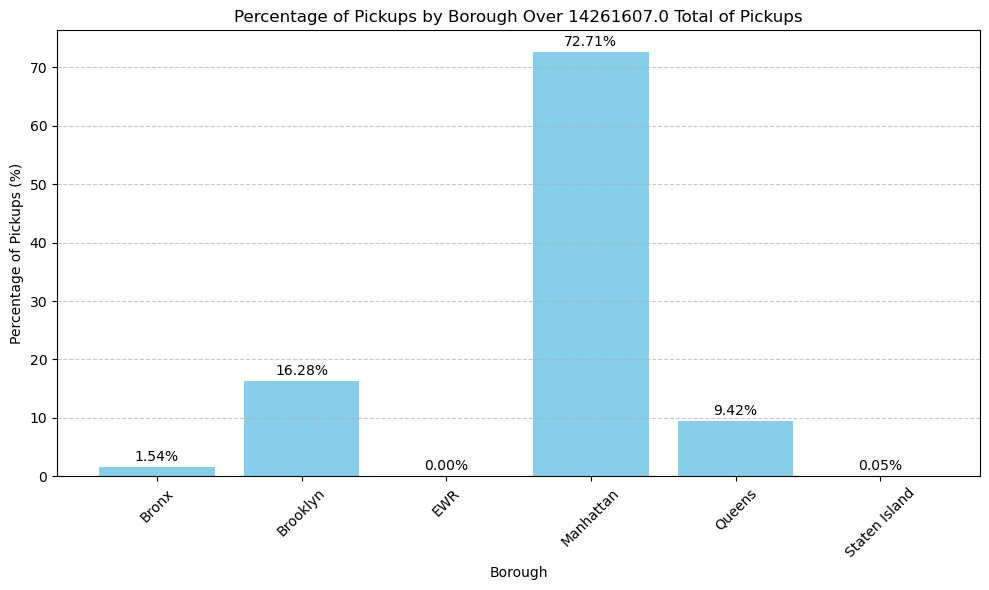

In [17]:
# Create a bar plot for the percentages
plt.figure(figsize=(10, 6))
plt.bar(borough_pickup_stats['borough'], borough_pickup_stats['percentage_of_pickups'], color='skyblue')
plt.title(f'Percentage of Pickups by Borough Over {total_pickups} Total of Pickups')
plt.xlabel('Borough')
plt.ylabel('Percentage of Pickups (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentages on top of each bar
for i, percentage in enumerate(borough_pickup_stats['percentage_of_pickups']):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center')

plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig(f'Images/Q3-Pickups-Percentage-by-Borough.jpg')
plt.show()

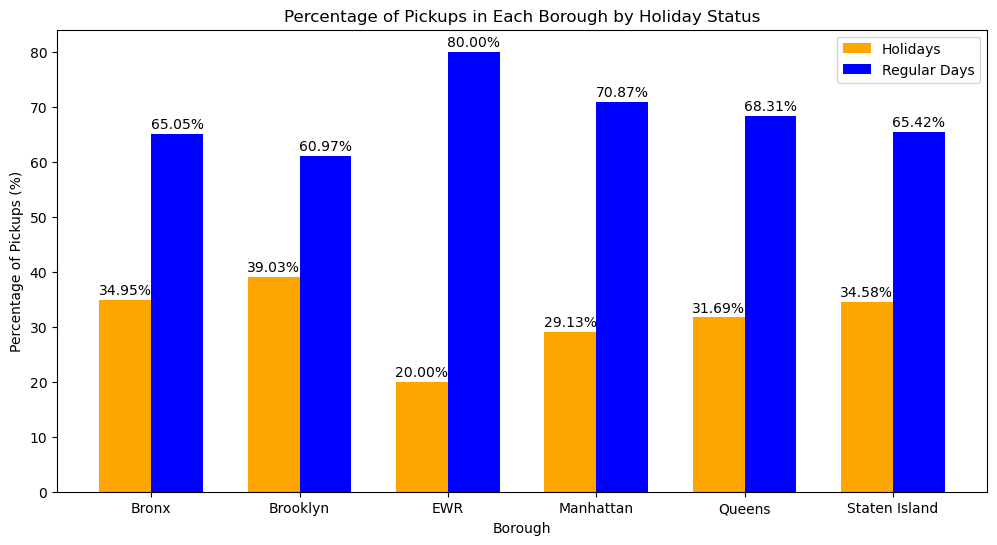

In [19]:

import matplotlib.pyplot as plt
import numpy as np
# Group the data by 'borough' and 'Holiday' and calculate the total pickups
borough_holiday_pickups = uber_weather_df.groupby(['borough', 'Holiday'])['pickups'].sum().unstack(fill_value=0)

# Calculate the total pickups for each borough
total_borough_pickups = borough_holiday_pickups.sum(axis=1)

# Calculate the percentage of pickups for each borough by holiday status
percentage_pickups = (borough_holiday_pickups.T / total_borough_pickups).T * 100

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 6))

width = 0.35
x = np.arange(len(percentage_pickups.index))
labels = percentage_pickups.index

holidays = percentage_pickups[True]
regular_days = percentage_pickups[False]

bar1 = ax.bar(x - width/2, holidays, width, label='Holidays', color='orange')
bar2 = ax.bar(x + width/2, regular_days, width, label='Regular Days', color='blue')

ax.set_xlabel('Borough')
ax.set_ylabel('Percentage of Pickups (%)')
ax.set_title('Percentage of Pickups in Each Borough by Holiday Status')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the percentages on top of each bar
for i in x:
    ax.text(i - width/2, holidays[i] + 1, f'{holidays[i]:.2f}%', ha='center')
    ax.text(i + width/2, regular_days[i] + 1, f'{regular_days[i]:.2f}%', ha='center')

# Save the plot as an image file (e.g., PNG)
plt.savefig(f'Images/Q3-RegularVsHoliday-Percentage-by-Borough.jpg')
plt.show()

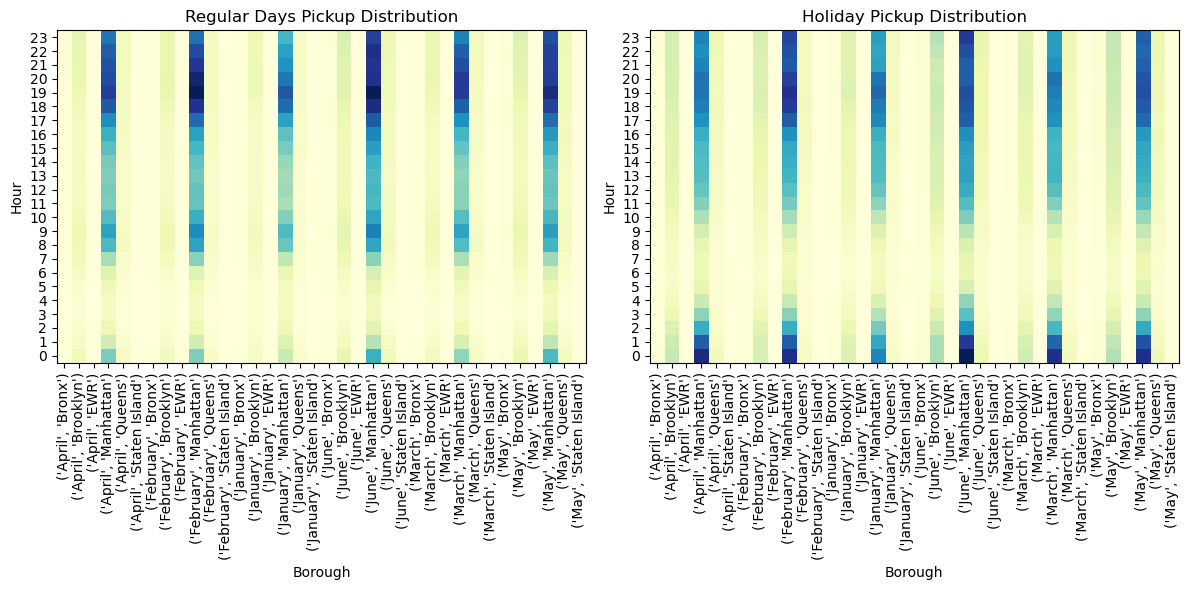

In [21]:
# Filter the data for regular days (not holidays
regular_days_data = uber_weather_df[uber_weather_df['Holiday'] == False]
regular_days_data
# Group the data by borough, month, and hour for regular days
regular_days_grouped = regular_days_data.groupby(['borough', 'month', 'hour'])['pickups'].mean().reset_index()

# Pivot the data for regular days to create a heatmap
regular_days_pivot = regular_days_grouped.pivot_table(index='hour', columns=['month', 'borough'], values='pickups')

# Assuming you have a similar process for holiday data
holiday_data = uber_weather_df[uber_weather_df['Holiday'] == True]
holiday_grouped = holiday_data.groupby(['borough', 'month', 'hour'])['pickups'].mean().reset_index()
holiday_pivot = holiday_grouped.pivot_table(index='hour', columns=['month', 'borough'], values='pickups')

# Plotting regular day pickup distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(regular_days_pivot, cmap='YlGnBu', aspect='auto', origin='lower')
plt.title('Regular Days Pickup Distribution')
plt.xlabel('Borough')
plt.ylabel('Hour')
plt.xticks(range(len(regular_days_pivot.columns)), regular_days_pivot.columns, rotation=90)
plt.yticks(range(len(regular_days_pivot.index)), regular_days_pivot.index)

# Plotting holiday pickup distribution
plt.subplot(1, 2, 2)
plt.imshow(holiday_pivot, cmap='YlGnBu', aspect='auto', origin='lower')
plt.title('Holiday Pickup Distribution')
plt.xlabel('Borough')
plt.ylabel('Hour')
plt.xticks(range(len(holiday_pivot.columns)), holiday_pivot.columns, rotation=90)
plt.yticks(range(len(holiday_pivot.index)), holiday_pivot.index)

plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig(f'Images/Q3-Distribution-by-Hour-by-Borough.jpg')
plt.show()